## Imports

In [1]:
%run -n train.py

In [2]:
%run models/__init__.py

In [3]:
%run utils.py

In [4]:
%run utilsT.py

In [5]:
device = get_torch_device()
device

device(type='cuda')

In [5]:
# In server
BASE_DIR = '/mnt/data/chest-x-ray-8'
DATASET_DIR = BASE_DIR + "/dataset"
CMS_DIR = BASE_DIR + "/cms"

## Params

In [7]:
TRAIN_RESNET = False
N_EPOCHS = 2
BATCH_SIZE = 5
FLUSH_SECS = 10 # Use a low value when debugging

# Use None to unset the maximum
train_max_images = 100 # None
val_max_images = 100 # None # 2000 # None

In [8]:
learning_rate = 1e-6
optimizer_moment = 0.9
weight_decay = 1

In [9]:
chosen_diseases = list(ALL_DISEASES)
# chosen_diseases = ALL_DISEASES[1:2]
chosen_diseases

['Atelectasis',
 'Cardiomegaly',
 'Effusion',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pneumonia',
 'Pneumothorax',
 'Consolidation',
 'Edema',
 'Emphysema',
 'Fibrosis',
 'Pleural_Thickening',
 'Hernia']

## Train

In [10]:
opt_params = {
    "lr": learning_rate,
    # "momentum": optimizer_moment,
    "weight_decay": weight_decay,
}

In [11]:
%run -n train.py

In [12]:
# resume_run = "1108_145909_resnet_all" # ""
# resume_run = ""
resume_run = "debug/1112_164849_all"

In [13]:
model_run = train_model(base_dir=BASE_DIR,
                        resume=resume_run,
                        model_name="v1",
                        chosen_diseases=chosen_diseases,
                        n_epochs=N_EPOCHS,
                        batch_size=BATCH_SIZE,
                        shuffle=True,
                        opt="adam",
                        opt_params=opt_params,
                        train_resnet=TRAIN_RESNET,
                        image_format="RGB",
                        flush_secs=FLUSH_SECS,
                        train_max_images=train_max_images,
                        val_max_images=val_max_images,
                        experiment_mode="debug",
                        save=True,
                        save_cms=True,
                        write_graph=False,
                        write_emb=False,
                        write_emb_img=False,
                        write_img=False,
                       )

Using device:  cuda
Loading train dataset...
Loading val dataset...
Chosen diseases:  ['Edema', 'Infiltration', 'Emphysema', 'Hernia', 'Atelectasis', 'Fibrosis', 'Pneumothorax', 'Pleural_Thickening', 'Consolidation', 'Effusion', 'Pneumonia', 'Mass', 'Nodule', 'Cardiomegaly']
Run name:  1112_165125_all
Saved TB in:  /mnt/data/chest-x-ray-8/runs/debug/1112_165125_all
HPARAM:  {'opt_weight_decay': 1, 'train_resnet': False, 'opt': 'adam', 'opt_lr': 1e-06, 'resume': 'debug/1112_164849_all', 'batch_size': 5, 'model_name': 'v1', 'n_diseases': 14, 'diseases': 'Edema,Pneumonia,Infiltration,Mass,Nodule,Atelectasis,Cardiomegaly,Consolidation,Fibrosis,Pleural_Thickening,Pneumothorax,Effusion,Emphysema,Hernia', 'samples (train, val)': '100,100', 'loss': 'wbce', 'shuffle': True, 'n_epochs': 2}
--------------------------------------------------
Training...
Finished epoch 1/2, loss 104.12142181396484 (val 98.85968017578125)
Finished epoch 2/2, loss 93.70399475097656 (val 90.11981964111328)
Average tim

In [14]:
model_run.model

ResnetBasedModel(
  (model_ft): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          

In [14]:
model_run.run_name

'1112_155813_all'

In [40]:
model_run.trainer.state.metrics

{'acc_Atelectasis': 0.94,
 'acc_Cardiomegaly': 0.99,
 'acc_Consolidation': 0.03,
 'acc_Edema': 1.0,
 'acc_Effusion': 0.18,
 'acc_Emphysema': 0.98,
 'acc_Fibrosis': 0.06,
 'acc_Hernia': 0.08,
 'acc_Infiltration': 0.2,
 'acc_Mass': 0.08,
 'acc_Nodule': 0.7,
 'acc_Pleural_Thickening': 0.28,
 'acc_Pneumonia': 0.02,
 'acc_Pneumothorax': 0.8,
 'cm_Atelectasis': tensor([[94,  0],
         [ 6,  0]]),
 'cm_Cardiomegaly': tensor([[99,  0],
         [ 1,  0]]),
 'cm_Consolidation': tensor([[ 0, 97],
         [ 0,  3]]),
 'cm_Edema': tensor([[100,   0],
         [  0,   0]]),
 'cm_Effusion': tensor([[ 6, 82],
         [ 0, 12]]),
 'cm_Emphysema': tensor([[98,  0],
         [ 2,  0]]),
 'cm_Fibrosis': tensor([[ 6, 94],
         [ 0,  0]]),
 'cm_Hernia': tensor([[ 8, 92],
         [ 0,  0]]),
 'cm_Infiltration': tensor([[ 0, 80],
         [ 0, 20]]),
 'cm_Mass': tensor([[ 5, 92],
         [ 0,  3]]),
 'cm_Nodule': tensor([[69, 24],
         [ 6,  1]]),
 'cm_Pleural_Thickening': tensor([[24, 72],
  

In [15]:
chosen_diseases = model_run.chosen_diseases

## Load model

In [7]:
run_name = "1119_115517_resnet_v2_Cardiomegaly"
# "1105_193619_shuffle_all"

In [8]:
model, model_name, optimizer, opt_name, chosen_diseases = load_model(BASE_DIR, run_name)
model = model.to(device)

NameError: name 'device' is not defined

In [ ]:
_ = model.train(False)

In [13]:
model.prediction

Sequential(
  (0): Dropout2d(p=0.2)
  (1): Linear(in_features=2048, out_features=100, bias=True)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=100, out_features=1, bias=True)
  (4): Sigmoid()
)

## Load data

In [28]:
%%time
dataset, dataloader = prepare_data(DATASET_DIR, "test", chosen_diseases, BATCH_SIZE, max_images=None)
n_images, n_diseases = dataset.size()
n_images, n_diseases

CPU times: user 30.9 s, sys: 176 ms, total: 31.1 s
Wall time: 31.1 s


(25596, 14)

### Test broken image (load every image)

In [24]:
%%time

start_idx = 0 # 70000

for idx in range(start_idx, len(dataset)):
    item = dataset[idx]

CPU times: user 2min 19s, sys: 856 ms, total: 2min 20s
Wall time: 1min 12s


## Plot confusion matrices

In [9]:
%run utils.py

In [10]:
train_cms = np.load(CMS_DIR + "/" + run_name + "_train.npy") # train, val or all
train_cms.shape

(1, 2, 2)

In [11]:
val_cms = np.load(CMS_DIR + "/" + run_name + "_val.npy") # train, val or all
val_cms.shape

(1, 2, 2)

In [12]:
n_diseases, _, _ = train_cms.shape
n_diseases

1

Left: training
Right: validation


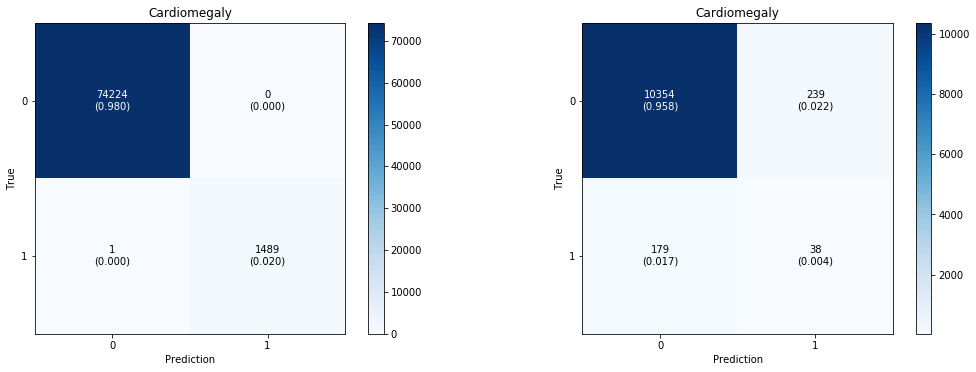

In [13]:
classes = [0, 1] # negative, positive

plt.figure(figsize=(18,80/14 * n_diseases))
plot_train_val_cms(train_cms, val_cms, classes, chosen_diseases, percentage=True)

## Gen images with bbox and activation

In [21]:
def gen_image_with_bbox(model, dataset, image_name, chosen_diseases):
    bboxes = []

    image, labels, _, bboxes_raw, are_valid = dataset.get_by_name(image_name)

    # Convert to batch
    images = image.view(1, *image.shape)

    # Image to GPU
    images = images.to(device)

    # Pass thru model
    with torch.no_grad():
        predictions, _, activations = model(images)

    # Copy bbox
    for disease_index, (bbox, is_valid) in enumerate(zip(bboxes_raw, are_valid)):
        is_valid = bool(is_valid.item())
        disease_name = chosen_diseases[disease_index]
        if is_valid:
            x, y, w, h = bbox.numpy()
            bboxes.append((disease_name, x, y, w, h))

    return image.numpy(), labels, predictions[0].cpu().numpy(), bboxes, activations[0].cpu().numpy()

In [22]:
image_name = "00010277_000.png"

In [23]:
image, gt, prediction, bboxes, activation = gen_image_with_bbox(model_run.model,
                                                                dataset,
                                                                image_name,
                                                                chosen_diseases)
image.shape, gt.shape, prediction.shape, bboxes, activation.shape

((3, 512, 512),
 (14,),
 (14,),
 [('Effusion', 863.0, 693.0, 72.0, 112.0),
  ('Infiltration', 633.0, 416.0, 271.0, 221.0),
  ('Mass', 297.0, 310.0, 540.0, 277.0),
  ('Pneumonia', 642.0, 423.0, 265.0, 223.0)],
 (14, 16, 16))

In [24]:
image = np.interp(image, (image.min(), image.max()), (0, 1))

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [71]:
colors = ["red", "blue", "cyan", "green"]

In [85]:
list(enumerate(chosen_diseases))

[(0, 'Atelectasis'),
 (1, 'Cardiomegaly'),
 (2, 'Effusion'),
 (3, 'Infiltration'),
 (4, 'Mass'),
 (5, 'Nodule'),
 (6, 'Pneumonia'),
 (7, 'Pneumothorax'),
 (8, 'Consolidation'),
 (9, 'Edema'),
 (10, 'Emphysema'),
 (11, 'Fibrosis'),
 (12, 'Pleural_Thickening'),
 (13, 'Hernia')]

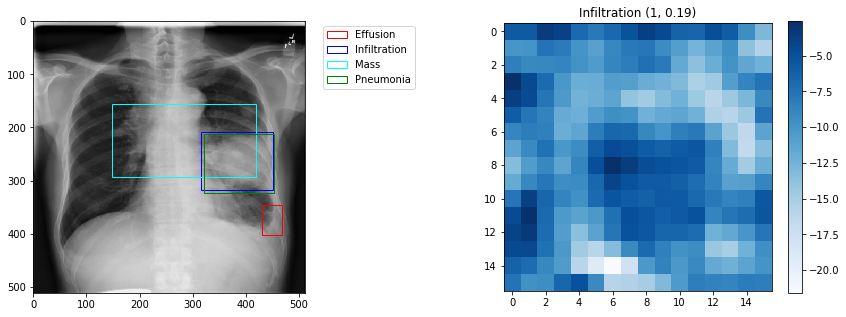

In [107]:
plt.figure(figsize=(15, 5))

plt.subplots_adjust(wspace=0.5)

plt.title(image_name)
plt.subplot(1, 2, 1)
plt.imshow(image.transpose(1, 2, 0))

scale = 2

ax = plt.gca()
for index, bbox in enumerate(bboxes):
    disease, x, y, width, height = bbox
    
    x /= scale
    y /= scale
    width /= scale
    height /= scale
    
    color = colors[index]
    rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor=color, facecolor="none", label=disease)
    ax.add_patch(rect)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.subplot(1, 2, 2)
disease_index = 3
disease_name = chosen_diseases[disease_index]
pred = prediction[disease_index]

plt.title("{} ({}, {:.2f})".format(disease_name, gt[disease_index], pred))
plt.imshow(activation[disease_index], cmap="Blues")
plt.colorbar()

In [116]:
list(enumerate(gt))

[(0, 0),
 (1, 1),
 (2, 0),
 (3, 1),
 (4, 0),
 (5, 1),
 (6, 1),
 (7, 0),
 (8, 1),
 (9, 0),
 (10, 0),
 (11, 0),
 (12, 1),
 (13, 0)]

In [117]:
chosen_diseases[11]

'Fibrosis'

In [113]:
list(enumerate(prediction > 0.5))

[(0, False),
 (1, False),
 (2, False),
 (3, False),
 (4, False),
 (5, True),
 (6, False),
 (7, False),
 (8, False),
 (9, False),
 (10, False),
 (11, True),
 (12, False),
 (13, False)]

## Add images to TB

In [15]:
def tb_write_images_together(writer, image_name, activations):
    # NOTE: this function is not used

    expanded_activation = np.expand_dims(activations, -1)

    npad = ((0, 0), (5, 5), (5, 5), (0, 0))
    padded_activation = np.pad(expanded_activation, pad_width=npad, mode='constant', constant_values=0)

    writer.add_images(
        image_name + "_activ", padded_activation, dataformats="NHWC")

## Plot activations

In [37]:
images, labels, _, _, _ = next(iter(dataloader))
images = images.to(device)
images.size()

torch.Size([20, 3, 512, 512])

In [38]:
with torch.no_grad():
    pred, embedding, activation = model(images)

In [43]:
activation.size()

torch.Size([20, 14, 16, 16])

In [39]:
images = images.cpu()
activation = activation.cpu()

In [36]:
import matplotlib.pyplot as plt

In [51]:
labels.size()

torch.Size([20, 1])

Prediction:  0.06491883844137192
Label:  1


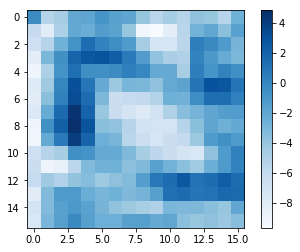

In [50]:
image_idx = 0
disease_idx = 0

prediction = pred[image_idx, disease_idx].item()
label = labels[image_idx, disease_idx].item()

plt.imshow(activation[image_idx, disease_idx], cmap="Blues")
plt.colorbar()

print("Prediction: ", prediction)
print("Label: ", label)

In [116]:
images.size()

torch.Size([4, 3, 512, 512])

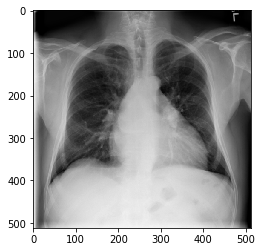

In [126]:
plt.imshow(images[image_idx][0], cmap="gray")

***
***

# Old

In [27]:
# FIXME: this code is to calculate the loss of the bbox prediction,
# though the metric should be different? don't use binary cross entropy?

#     # Get valid bbox_list
#     # REVIEW: make bbox_list a tensor? and then send to device? same on seg_list below
#     bbox_list = []
#     n_samples, n_labels = bbox_valids.size()
#     for i in range(n_samples):
#         bbox_list.append([])
#         for j in range(n_labels):
#             if bbox_valids[i][j] == 1:
#                 bbox_list[i].append(bboxes[i][j])
#         bbox_list[i] = torch.stack(bbox_list[i]).to(device)
    
    
#     # Segmentation lists
#     seg_list = []
#     for i in range(n_samples):
#         seg_list.append([])
#         for j in range(n_labels):
#             if bbox_valids[i][j] == 1:
#                 seg_list[i].append(segments[i][j])
#         seg_list[i] = torch.stack(seg_list[i]).to(device)
    
#     # Compute bbox loss
#     for i in range(len(seg_list)):
#         # REVIEW: do this with a tensor? avoid the loop
#         loss += 5/(512*512) * weighted_cross_entropy(seg_list[i], bbox_list[i], weights=(10, 1))
        
#         break
# #         print(seg_list[i].size())
# #         print(bbox_list[i].size())
# #         break